In [1]:
import matplotlib.pyplot as plt
import torch, numpy as np

In [38]:
x = torch.rand(16, 4,20,10) * 10 + 4
x2 = torch.rand(16, 4,20,10) * 0.1 +-100

x = torch.cat((x2,x), 0)

def znormcbatch(x:torch.Tensor, mean=0., std=1.):
    """channel-wise Z-normalization"""
    std = x.std(list(range(2, x.ndim)), keepdim = True) / std
    std[std==0] = 1
    return ((x - x.mean(list(range(2, x.ndim)), keepdim=True)) / std) + mean

normalized = znormcbatch(x, -2, 0.1)
normalized.mean(), normalized.std()

def norm(x:torch.Tensor | np.ndarray, min=0, max=1): #pylint:disable=W0622
    """Normalize to `[min, max]`"""
    x -= x.min()
    if x.max()!=0:
        x /= x.max()
    else: return x
    x *= max - min
    x += min
    return x

0 255
0.0 255.0


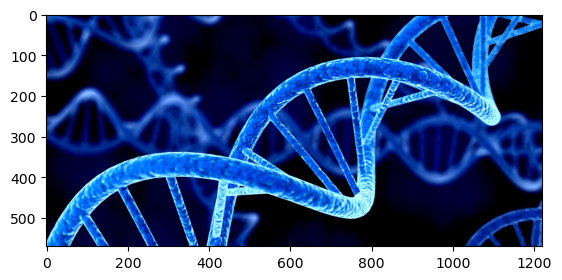

In [41]:
image = plt.imread(r"C:\Users\nkshv\Pictures\asz.jpg")
def contrast(x, min=0.2, max=0.8):
    """Shrink the range of the input and expand back to original range"""
    xmin = x.min()
    xmax = x.max()
    r = xmax - xmin
    return norm(x.clip(xmin + r * min, xmax - r * (1-max)), xmin, xmax)


print(image.min(), image.max())
print(contrast(image, 0.2, 0.5).min(), contrast(image, 0.2, 0.3).max())
plt.imshow(contrast(image, 0.2, 0.7).astype(np.uint8))